## Logistic Regression Pipeline for A549 (GREG)

### Loading Packages

In [1]:
install.packages("glmnet", repos = "https://cran.us.r-project.org")
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.0-2



### Loading Data

In [2]:
a549greg <- read.table("A549forML.txt", header = TRUE) ## loading data
a549greg <- a549greg[, -c(1:3)] ## removing the first three columns for non-usage in the ML model.

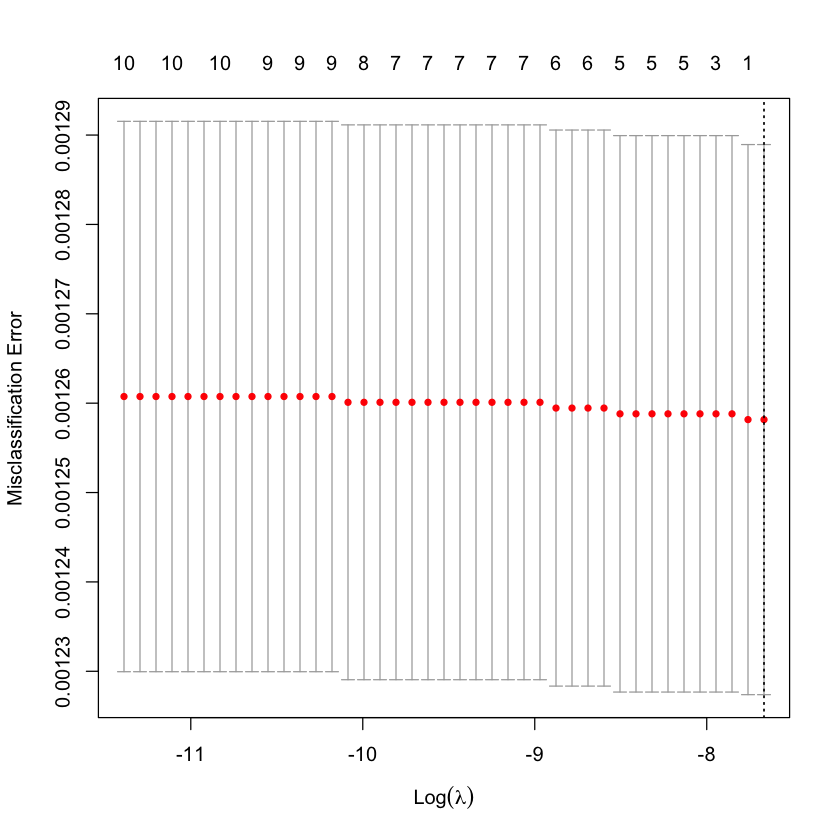

In [3]:
set.seed(005)
cv.modelfit <- cv.glmnet(as.matrix(a549greg[,1:12]),
                         a549greg$Class,
                         family = "binomial",
                         type.measure = "class",
                         alpha = 1,
                         nlambda = 100)


plot(cv.modelfit)

In [4]:
cat("There are", length(cv.modelfit$lambda),
    "lambda values in all:\n",
    cv.modelfit$lambda,
    "\n, out of which",
    min(cv.modelfit$lambda),
    "is the minimum, while",
    cv.modelfit$lambda.1se,
    "denotes the value at which the model is optimized at one standard error.")

There are 41 lambda values in all:
 0.0004680186 0.0004264411 0.0003885573 0.0003540389 0.0003225871 0.0002939293 0.0002678174 0.0002440253 0.0002223468 0.0002025941 0.0001845962 0.0001681972 0.000153255 0.0001396402 0.000127235 0.0001159318 0.0001056327 9.62486e-05 8.769814e-05 7.990728e-05 7.280854e-05 6.634043e-05 6.044693e-05 5.507699e-05 5.01841e-05 4.572588e-05 4.166372e-05 3.796243e-05 3.458995e-05 3.151708e-05 2.871719e-05 2.616603e-05 2.384151e-05 2.17235e-05 1.979364e-05 1.803523e-05 1.643303e-05 1.497317e-05 1.364299e-05 1.243098e-05 1.132665e-05 
, out of which 1.132665e-05 is the minimum, while 0.0004680186 denotes the value at which the model is optimized at one standard error.

In [5]:
set.seed(2)
modelfit <- glmnet(as.matrix(a549greg[,1:12]),
                   a549greg$Class,
                   family = "binomial",
                   alpha = 1,
                   lambda = min(cv.modelfit$lambda))
# Listing non-zero coefficients
print(modelfit$beta[,1])

        CTCF        EP300     H3K27me3     H3K36me3      H3K4me1      H3K4me2 
-0.085831339 -0.044517940 -0.044367058 -0.170825653 -0.021758567 -0.020956371 
     H3K4me3       H3K9ac      H3K9me3        RAD21      RNAPol2          YY1 
 0.000000000 -0.004894414  0.024193190  0.055130404  0.000000000 -0.003314569 


In [6]:
coef(modelfit)[,1]
predict(modelfit, type="coef")

(Intercept)         CTCF        EP300     H3K27me3     H3K36me3      H3K4me1 
 6.920308396 -0.085831339 -0.044517940 -0.044367058 -0.170825653 -0.021758567 
     H3K4me2      H3K4me3       H3K9ac      H3K9me3        RAD21      RNAPol2 
-0.020956371  0.000000000 -0.004894414  0.024193190  0.055130404  0.000000000 
         YY1 
-0.003314569

13 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  6.920308396
CTCF        -0.085831339
EP300       -0.044517940
H3K27me3    -0.044367058
H3K36me3    -0.170825653
H3K4me1     -0.021758567
H3K4me2     -0.020956371
H3K4me3      .          
H3K9ac      -0.004894414
H3K9me3      0.024193190
RAD21        0.055130404
RNAPol2      .          
YY1         -0.003314569

In [7]:
a549greg1 <- a549greg ## creating a copy

set.seed(7) # for reproducibility of results.
a549greg1$Class <- as.numeric(as.factor(a549greg1$Class))-1
part <- sample(2, nrow(a549greg1),
               replace = TRUE,
               prob = c(0.8,0.2))
train <- a549greg1[part==1,]
test <- a549greg1[part==2,]
cat("So, now we have",
    nrow(train),
    "training rows and",
    nrow(test),
    "testing rows")

a549model <- glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2
+ YY1 ,
               data = train,
               family = "binomial")
summary(a549model)

So, now we have 1238598 training rows and 309694 testing rows

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Class ~ CTCF + EP300 + H3K27me3 + H3K36me3 + H3K4me1 + 
    H3K4me2 + H3K4me3 + H3K9ac + H3K9me3 + RAD21 + RNAPol2 + 
    YY1, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7415   0.0446   0.0472   0.0504   1.4458  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.962461   0.035637 195.372  < 2e-16 ***
CTCF        -0.092158   0.018745  -4.916 8.81e-07 ***
EP300       -0.048060   0.014207  -3.383 0.000717 ***
H3K27me3    -0.058160   0.025547  -2.277 0.022810 *  
H3K36me3    -0.200180   0.022992  -8.706  < 2e-16 ***
H3K4me1     -0.022353   0.004639  -4.819 1.45e-06 ***
H3K4me2     -0.019419   0.013903  -1.397 0.162478    
H3K4me3      0.001039   0.012806   0.081 0.935343    
H3K9ac      -0.005865   0.002348  -2.497 0.012507 *  
H3K9me3      0.050566   0.023347   2.166 0.030321 *  
RAD21        0.069105   0.016849   4.102 4.10e-05 ***
RNAPol2      0.003772   0.006230   0.605

In [8]:
install.packages("rms", repos = "https://cran.us.r-project.org")
library(rms)

vif(a549model)

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




CTCF    EP300 H3K27me3 H3K36me3  H3K4me1  H3K4me2  H3K4me3   H3K9ac 
2.028517 2.194345 1.232524 1.792967 2.162868 5.703339 6.861705 2.174600 
 H3K9me3    RAD21  RNAPol2      YY1 
1.819429 3.769259 2.383507 3.284185

In [9]:
yTrain <- predict(a549model, train, type = "response")
head(yTrain)

2         3         4         5         6         7 
0.9990541 0.9990541 0.9990541 0.9990541 0.9990164 0.9990196

In [10]:
head(train)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0.00000000,0.00000000,0.000000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,1
3,0,0,0.00000000,0.00000000,0.000000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,1
4,0,0,0.00000000,0.00000000,0.000000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,1
5,0,0,0.00000000,0.00000000,0.000000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,1
6,0,0,0.02727825,0.02613314,1.585340,0,0.03331304,1.537907,0.02891425,0.1631014,0.06050439,0.05796767,1
7,0,0,0.00000000,0.00000000,1.325448,0,0.00000000,1.098505,0.00000000,0.0000000,0.06050439,0.00000000,1


In [11]:
prediction_probabilities_train <- ifelse(yTrain > 0.5, 1, 0) # Probabilities to Labels conversion
confusion_matrix_train <- table(Predicted = prediction_probabilities_train, Actual = train$Class)
print(confusion_matrix_train)

         Actual
Predicted       0       1
        0       0       2
        1    1522 1237074


In [12]:
misclassfication_error_train <- 1- sum(diag(confusion_matrix_train))/sum(confusion_matrix_train)
cat("The misclassification error in train data is",
    (round(misclassfication_error_train*100)), "percent")

The misclassification error in train data is 0 percent

In [13]:
yTest <- predict(a549model, test, type = "response")
prediction_probabilities_test <- ifelse(yTest > 0.5, 1, 0)
confusion_matrix_test <- table(Predicted = prediction_probabilities_test, Actual = test$Class)
print(confusion_matrix_test)

         Actual
Predicted      0      1
        1    426 309268


In [14]:
misclassfication_error_test <- 1- sum(diag(confusion_matrix_test))/sum(confusion_matrix_test)
cat("The misclassification error in test data is",
    (round(misclassfication_error_test*100)), "percent")

The misclassification error in test data is 100 percent

In [15]:
overall_p <- with(a549model,
                  pchisq(null.deviance-deviance,
                         df.null-df.residual,
                         lower.tail = FALSE))
cat("The statistical significance for the model is", overall_p, "\n")

The statistical significance for the model is 2.41607e-40 


In [16]:
cat("The confidence level for this model is",
    ((1-overall_p)*100), "percent")

The confidence level for this model is 100 percent